BUAD 5092 Module 2

Jason Street

# Question 1: Problem 3.2(a)

Consider problem 2(a) in Chapter 3.

Setup and solve the problem in Excel/Solver. Include a screenshot of your Excel model, along with the Solver window, in your Jupyter Notebook (and consequently your PDF report).

    To do this, simply save the screenshot as an image and place it in the same directory as your Jupyter Notebook file.
    
    You may use the following code example to include the screenshot in your Jupyter Notebook:
            from IPython import display
            display.Image("./screenshot_name.png")

Formulate the problem in Jupyter Notebook. Setup and solve the problem in Python/Gurobi.

## Excel Model

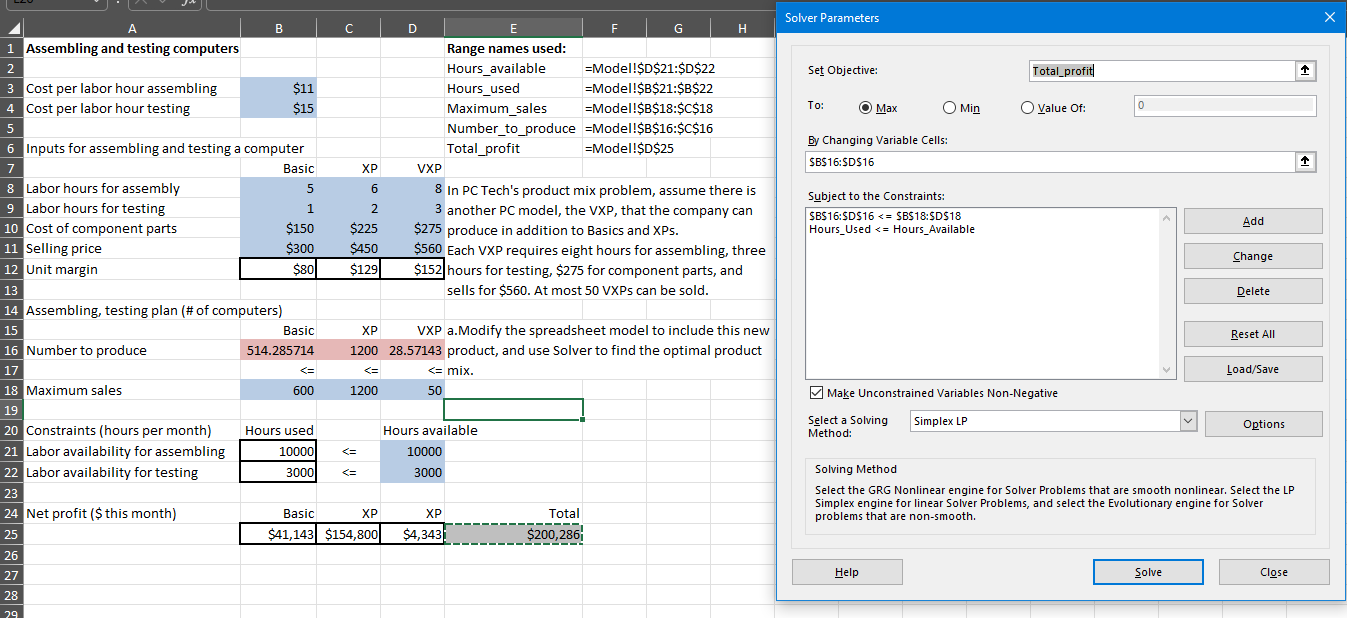

In [1]:
from IPython import display
display.Image("./M2_q1_screenshot.png")

## Formulate the Problem in Jupyter Notebook

### Model Formulation

**Sets** \
$C$: set of computers \{1=Basic, 2=XP, 3=VXP\} \
$P$: set of processes \{1=assembly, 2=testing\}

**Parameters** \
$v$: vector of unit profits ($v_1 = 80$, $v_2 = 129$, $v_3 = 152$) \
$d$: vector of demands ($d_1 = 600$, $d_2 = 1200$, $d_3 = 50$) \
$r$: vector of available hourly resources ($r_1 = 10000$, $r_2 = 3000$) \
$A$: matrix of hourly resource requirements, where $a_{i,j}$ represents the hours of process $i$ to produce computer $j$. For example, $a_{1,2} = 6$ because it takes $6$ hours of assembly ($i=1$) to produce XP computers ($j=2$).

**Decision Variables** \
$x$: vector amount of each type of computer to produce, where $x_1$ is Basic, $x_2$ is XP, and $x_3$ is VXP.

**Objective Function and Constraints** \
The optimization model is formulated as


\begin{equation*}
\begin{matrix}
\underset{x}{\max} & 80x_1 + 129x_2 + 152x_3  &\\
\textrm{s.t.} & 5x_1+6x_2+8x_3 & \leq & 10000 &  \\ 
& x_1+2x_2+3x_3 & \leq & 3000 &  \\
& x_1 & \leq & 600  & \\
& x_2 & \leq & 1200  & \\
& x_3 & \leq & 50 & \\
& x_1,x_2,x_3 & \geq & 0 &  \\
\end{matrix}
\end{equation*}

## Setup and solve the problem in Python/Gurobi

In [2]:
from gurobipy import *
m = Model('question1')

# Sets
## We do not need to define sets.

# Parameters
## We do not need to define parameters.

# Decision Variables
## Number of basic computers to produce
x1 = m.addVar(name='Basic', ub=600, lb=0)
## Number of XP computers to produce
x2 = m.addVar(name='XP', ub=1200, lb=0)
## Number of VXP computers to produce
x3 = m.addVar(name='VXP', ub=50, lb =0)
m.update()

# Objective Function
## Maximize total profit
m.setObjective(80*x1+129*x2+152*x3, GRB.MAXIMIZE)
m.update()

# Constraints
## Assembly hours constraint
m.addConstr(5*x1+6*x2+8*x3 <= 10000)
## Testing hours constraint
m.addConstr(1*x1+2*x2+3*x3 <= 3000)
m.update()

# Solve and Print Solution
m.optimize()
print("\n\n")
print("PC Tech should produce %s units of Basic computers." % x1.x )
print("PC Tech should produce %s units of XP computers." % x2.x )
print("PC Tech should produce %s units of VXP computers." % x3.x )
print("The total profit is %s." % m.objval )

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-07
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 3 columns and 6 nonzeros
Model fingerprint: 0x38136073
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [8e+01, 2e+02]
  Bounds range     [5e+01, 1e+03]
  RHS range        [3e+03, 1e+04]
Presolve time: 0.01s
Presolved: 2 rows, 3 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1500000e+05   2.750000e+02   0.000000e+00      0s
       2    2.0028571e+05   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.002857143e+05



PC Tech should produce 514.2857142857143 units of Basic computers.
P

# Question 2: Problem 3.3

Consider problem 3 in Chapter 3.

Perform the sensitivity analysis in Excel by either rerunning your model manually or by using the SolverTable add-in. Include a screenshot of your Excel sensitivity analysis in your Jupyter Notebook.

Perform the sensitivity analysis in Python by iterating over the specified values and resolving your model each time. Create a graph of the objective function value vs. the VXP selling price.

## Sensativity Analysis - Excel

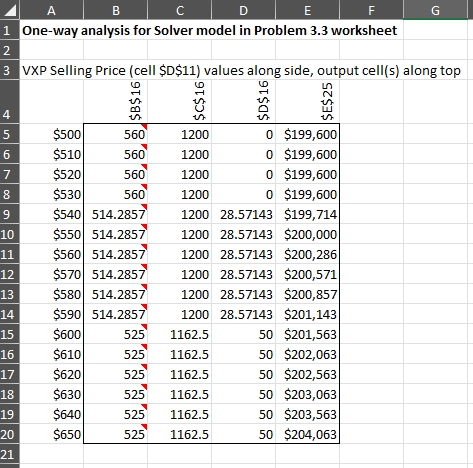

In [3]:
from IPython import display
display.Image("./M2_q2_screenshot.png")

## Sensitivity Analysis - Python

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 3 columns and 6 nonzeros
Model fingerprint: 0x175f0d7f
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [8e+01, 1e+02]
  Bounds range     [5e+01, 1e+03]
  RHS range        [3e+03, 1e+04]
Presolve time: 0.01s
Presolved: 2 rows, 3 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1500000e+05   2.750000e+02   0.000000e+00      0s
       1    1.9960000e+05   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.996000000e+05
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|A

Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 3 columns and 6 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [8e+01, 2e+02]
  Bounds range     [5e+01, 1e+03]
  RHS range        [3e+03, 1e+04]
LP warm-start: use basis
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0206250e+05   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.020625000e+05
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 3 columns and 6 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [8e+01, 2e+02]
  Bounds range     [5e+01, 1e+03]
  RHS range        [3e+03, 1e+04]
LP

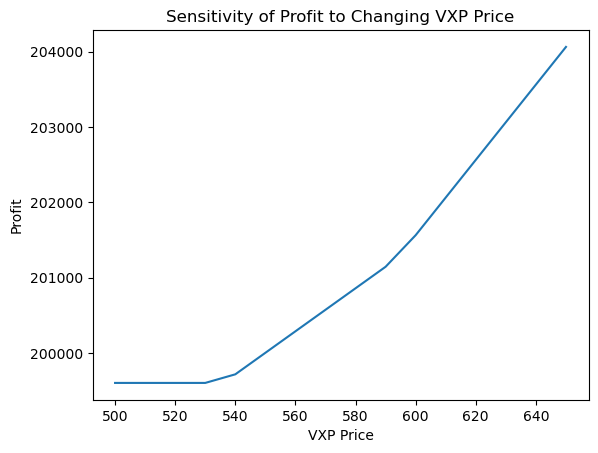

In [4]:
from gurobipy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
m = Model('question1')

# setup the model
# Decision Variables
## Number of basic computers to produce
x1 = m.addVar(name='Basic', ub=600, lb=0)
## Number of XP computers to produce
x2 = m.addVar(name='XP', ub=1200, lb=0)
## Number of VXP computers to produce
x3 = m.addVar(name='VXP', ub=50, lb=0)
m.update()

# Objective Function
## Maximize total profit
m.setObjective(80*x1+129*x2+(560-275-8*11-3*15)*x3, GRB.MAXIMIZE)
m.update()

# Constraints
## Note that upper and lower bound constraints on decision variables are addressed within variable declarations above.
## Assembly hours constraint
m.addConstr(5*x1+6*x2+8*x3 <= 10000)
## Testing hours constraint
m.addConstr(1*x1+2*x2+3*x3 <= 3000)
m.update()

# define data structure to hold values of interest
df = pd.DataFrame(columns=['PriceVXP','NumberBasic', 'NumberXP', 'NumberVXP', 'Profit'])
svxp = np.arange(500, 651, 10)

# loop over changing values
for i in range(len(svxp)):
# update and solve
    m.setObjective(80*x1+129*x2+(svxp[i]-275-8*11-3*15)*x3, GRB.MAXIMIZE)
    m.update()
    m.optimize()
    
    df.loc[i] = [svxp[i], x1.x, x2.x, x3.x, m.objval]

# print results
print(df)

plt.plot(df['PriceVXP'], df['Profit'])
plt.title('Sensitivity of Profit to Changing VXP Price')
plt.xlabel('VXP Price')
plt.ylabel('Profit')
plt.show()

# Question 3: Problem 3.46

**If you add a constraint to an optimization model, and the previously optimal solution satisfies the new constraint, will this solution still be optimal with the new constraint added? 
Why or why not?**

Yes. So long as the previous optimal solution satisfies the new constraint, remains in the feasible region, then it will remain optimal as the objective function is still the best among any additional feasible solutions.

# Question 4: Problem 3.50

**In a typical product mix model, where a company must decide how much of each product to produce to maximize profit, there are sometimes customer demands for the products.
We used upper-bound constraints for these: Don't produce more than you can sell.**

**Would it be realistic to have lower-bound constraints instead: Produce at least as much as is demanded? 
Would it be realistic to have both (where the upper bounds are greater than the lower bounds)? 
Would it be realistic to have equality constraints: Produce exactly what is demanded?**

If there was a previously established contract it would be realistic to produce at least as much as is demanded.

To have both seems to make the most sense as this keeps production within the business production and storage abilities but ensures there is some supply ready to go. This would be especially important for industires that have cyclic demands for the product.

For equality constraints, in a limited sense this would be realistic. Limited to those businesses that may have a quality over quantity focus.


# Question 5: Modified Lego Problem

Consider LEGO product mix problem discussed in Module 1. 

Modify this problem by adding a third product: Coffee Tables.

A single Coffee Table generates $15 in profit, uses 2 Big Blocks, and uses 1 Small Block. 

    Use the same data for Tables and Chairs as stated in the original problem.

Setup and solve the problem in Excel/Solver. Include a screenshot of your Excel model, along with the Solver window, in your Jupyter Notebook.

Setup and solve the problem in Python/Gurobi.

In your Jupyter Notebook, explain why the optimal profit of this modified version of the problem (with coffee tables) is greater than that of the original version of the problem (without coffee tables).

## Excel Model

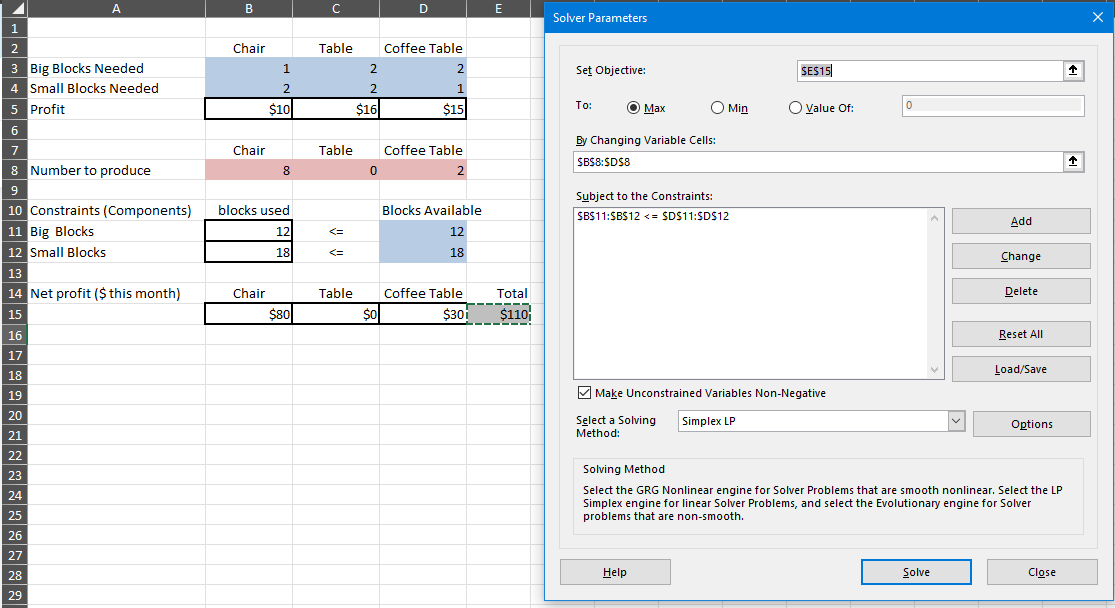

In [5]:
from IPython import display
display.Image("./M2_q5_screenshot.png")

## Formulate the Problem in Jupyter Notebook

### Model Formulation

**Sets** \
$P$: set of products\{1=Chair, 2=Table, 3=CoffeeTable\} \
$R$: set of resources\{1=big block, 2=small block\} \

**Parameters** \
$c$: vector of profits ($v_1 = 10$, $v_2 = 16$, $v_3 = 15$) \
$b$: vector of available lego block resources ($r_1 = 12$, $r_2 = 18$) \

**Decision Variables** \
$x$: vector amount of each type to produce, where $x_1$ is Chair, $x_2$ is Table, and $x_3$ is Coffee Table.

**Objective Function and Constraints** \
The optimization model is formulated as


\begin{equation*}
\begin{matrix}
\underset{x}{\max} & 10x_1 + 16x_2 + 15x_3  &\\
\textrm{s.t.} & 1x_1+2x_2+2x_3 & \leq & 12 &  \\ 
& 2x_1+2x_2+1x_3 & \leq & 18 &  \\
& x_1,x_2,x_3 & \geq & 0 &  \\
\end{matrix}
\end{equation*}

## Setup and solve the problem in Python/Gurobi

In [6]:
from gurobipy import *
m = Model('question5')

# Sets
## We do not need to define sets.

# Parameters
## We do not need to define parameters.

# Decision Variables
## Number of Chairs to produce
x1 = m.addVar(name='Chair', lb=0)
## Number of Tables to produce
x2 = m.addVar(name='Tables', lb=0)
## Number of Coffee Tables to produce
x3 = m.addVar(name='Coffee Tables', lb =0)
m.update()

# Objective Function
## Maximize total profit
m.setObjective(10*x1+16*x2+15*x3, GRB.MAXIMIZE)
m.update()

# Constraints
## Big Block constraint
m.addConstr(1*x1+2*x2+2*x3 <= 12)
## Small Block constraint
m.addConstr(2*x1+2*x2+1*x3 <= 18)
m.update()

# Solve and Print Solution
m.optimize()
print("\n\n")
print("Lego should produce %s units of Chairs." % x1.x )
print("Lego should produce %s units of Tables." % x2.x )
print("Lego should produce %s units of Coffee Tables." % x3.x )
print("The total profit is %s." % m.objval )

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 3 columns and 6 nonzeros
Model fingerprint: 0x548e7c69
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+01, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 2e+01]
Presolve time: 0.00s
Presolved: 2 rows, 3 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.1000000e+31   5.000000e+30   4.100000e+01      0s
       2    1.1000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.100000000e+02



Lego should produce 8.0 units of Chairs.
Lego should produce 0.0 units of Tables.
Lego should produce 2.0 units of Coffee Tables.
The total profit is 110.0.


**In your Jupyter Notebook, explain why the optimal profit of this modified version of the problem (with coffee tables) is greater than that of the original version of the problem (without coffee tables).**

In the unmodified Lego problem the optimal solution was 6 chairs and 3 tabels for a profit of 108 dollars.

The profit from chairs was 60 dollars and from the Tables 48 dollars.

In the modified Lego problem the optimal solution was 8 chairs and 2 coffee tables for a profit of 110 dollars.

The profit from the chairs was 80 dollars and from the Coffee Tables 30 dollars. 

When simplified down, the produced furniture required less building material and therefore allowed for more products to be generated and sold for profit.